In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
plant1 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
plant1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [ ]:
plant1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [ ]:
plant1.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


In [ ]:
plant1.PLANT_ID.value_counts()

,count
PLANT_ID,
4135001,3182


In [ ]:
# Lets drop PLANT_ID and SOURCE_KEY
plant1.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1, inplace=True)
plant1.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,24.621525,22.165423,0.0


Feature Engineering

In [ ]:
# Extract time features
plant1['datetime'] = pd.to_datetime(plant1['DATE_TIME'])
plant1 = plant1.sort_values('DATE_TIME')

In [ ]:
#Create new time features
plant1['hour'] = plant1['datetime'].dt.hour
plant1['day'] = plant1['datetime'].dt.day
plant1['month'] = plant1['datetime'].dt.month
plant1['year'] = plant1['datetime'].dt.year
plant1.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,datetime,hour,day,month,year
0,2020-05-15 00:00:00,25.184316,22.857507,0.0,2020-05-15 00:00:00,0,15,5,2020
1,2020-05-15 00:15:00,25.084589,22.761668,0.0,2020-05-15 00:15:00,0,15,5,2020
2,2020-05-15 00:30:00,24.935753,22.592306,0.0,2020-05-15 00:30:00,0,15,5,2020
3,2020-05-15 00:45:00,24.846130,22.360852,0.0,2020-05-15 00:45:00,0,15,5,2020
4,2020-05-15 01:00:00,24.621525,22.165423,0.0,2020-05-15 01:00:00,1,15,5,2020


In [ ]:
plant1['hour'].value_counts()

,count
hour,
19,136
18,136
22,136
20,136
9,136
10,136
8,136
11,135
21,135


In [ ]:
# Add Lag_Features: 15min, 1hr, and 24hrs
plant1['Irr_lag_1'] = plant1['IRRADIATION'].shift(1)
plant1['Irr_lag_4'] = plant1['IRRADIATION'].shift(4)
plant1['Irr_lag_24'] = plant1['IRRADIATION'].shift(96)

In [ ]:
# ROlling statistics
plant1['Irr_rolling_std'] = plant1['IRRADIATION'].rolling(window=12).std()
plant1['Irr_rolling_mean'] = plant1['IRRADIATION'].rolling(window=24).mean()

plant1.dropna(inplace=True)
plant1.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,datetime,hour,day,month,year,Irr_lag_1,Irr_lag_4,Irr_lag_24,Irr_rolling_std,Irr_rolling_mean
96,2020-05-16 02:45:00,21.496287,19.624870,0.0,2020-05-16 02:45:00,2,16,5,2020,0.0,0.0,0.0,0.0,0.000467
97,2020-05-16 03:00:00,21.645913,20.065206,0.0,2020-05-16 03:00:00,3,16,5,2020,0.0,0.0,0.0,0.0,0.000086
98,2020-05-16 03:15:00,21.674314,20.112160,0.0,2020-05-16 03:15:00,3,16,5,2020,0.0,0.0,0.0,0.0,0.000009
99,2020-05-16 03:30:00,21.731421,20.351884,0.0,2020-05-16 03:30:00,3,16,5,2020,0.0,0.0,0.0,0.0,0.000009
100,2020-05-16 03:45:00,21.780166,20.505894,0.0,2020-05-16 03:45:00,3,16,5,2020,0.0,0.0,0.0,0.0,0.000009


In [ ]:
if 'datetime' in plant1.columns:
    plant1.drop('datetime', axis=1, inplace=True)
plant1.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,hour,day,month,year,Irr_lag_1,Irr_lag_4,Irr_lag_24,Irr_rolling_std,Irr_rolling_mean
96,2020-05-16 02:45:00,21.496287,19.624870,0.0,2,16,5,2020,0.0,0.0,0.0,0.0,0.000467
97,2020-05-16 03:00:00,21.645913,20.065206,0.0,3,16,5,2020,0.0,0.0,0.0,0.0,0.000086
98,2020-05-16 03:15:00,21.674314,20.112160,0.0,3,16,5,2020,0.0,0.0,0.0,0.0,0.000009
99,2020-05-16 03:30:00,21.731421,20.351884,0.0,3,16,5,2020,0.0,0.0,0.0,0.0,0.000009
100,2020-05-16 03:45:00,21.780166,20.505894,0.0,3,16,5,2020,0.0,0.0,0.0,0.0,0.000009


In [ ]:
# Add cyclical features
plant1['hour_sin'] = np.sin(2 * np.pi * plant1['hour'] / 24)
plant1['hour_cos'] = np.cos(2 * np.pi * plant1['hour'] / 24)
plant1['day_sin'] = np.sin(2 * np.pi * plant1['day'] / 31)
plant1['day_cos'] = np.cos(2 * np.pi * plant1['day'] / 31)
plant1['month_sin'] = np.sin(2 * np.pi * plant1['month'] / 12)
plant1['month_cos'] = np.cos(2 * np.pi * plant1['month']/12)


In [ ]:
plant1['target'] = plant1['IRRADIATION'].shift(-1)

In [ ]:
plant1.dropna(inplace=True)
plant1.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,hour,day,month,year,Irr_lag_1,Irr_lag_4,Irr_lag_24,Irr_rolling_std,Irr_rolling_mean,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,target
96,2020-05-16 02:45:00,21.496287,19.624870,0.0,2,16,5,2020,0.0,0.0,0.0,0.0,0.000467,0.500000,0.866025,-0.101168,-0.994869,0.5,-0.866025,0.0
97,2020-05-16 03:00:00,21.645913,20.065206,0.0,3,16,5,2020,0.0,0.0,0.0,0.0,0.000086,0.707107,0.707107,-0.101168,-0.994869,0.5,-0.866025,0.0
98,2020-05-16 03:15:00,21.674314,20.112160,0.0,3,16,5,2020,0.0,0.0,0.0,0.0,0.000009,0.707107,0.707107,-0.101168,-0.994869,0.5,-0.866025,0.0
99,2020-05-16 03:30:00,21.731421,20.351884,0.0,3,16,5,2020,0.0,0.0,0.0,0.0,0.000009,0.707107,0.707107,-0.101168,-0.994869,0.5,-0.866025,0.0
100,2020-05-16 03:45:00,21.780166,20.505894,0.0,3,16,5,2020,0.0,0.0,0.0,0.0,0.000009,0.707107,0.707107,-0.101168,-0.994869,0.5,-0.866025,0.0


In [ ]:
plant1.shape

(3085, 20)

In [ ]:
plant1.columns

Index(['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'hour', 'day', 'month', 'year', 'Irr_lag_1', 'Irr_lag_4', 'Irr_lag_24',
       'Irr_rolling_std', 'Irr_rolling_mean', 'hour_sin', 'hour_cos',
       'day_sin', 'day_cos', 'month_sin', 'month_cos', 'target'],
      dtype='object')

In [ ]:
features = [
    'AMBIENT_TEMPERATURE',
    'MODULE_TEMPERATURE',
    'Irr_lag_1',
    'Irr_lag_4',
    'Irr_lag_24',
    'Irr_rolling_std',
    'Irr_rolling_mean',
    'hour_sin',
    'hour_cos',
    'day_sin',
    'day_cos',
    'month_sin',
    'month_cos']

In [ ]:
# TRAIN-TEST SPLIT

split = "2020-06-01"

train = plant1[plant1['DATE_TIME'] <= split]
test = plant1[plant1['DATE_TIME'] > split]



In [ ]:
train.columns

Index(['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'hour', 'day', 'month', 'year', 'Irr_lag_1', 'Irr_lag_4', 'Irr_lag_24',
       'Irr_rolling_std', 'Irr_rolling_mean', 'hour_sin', 'hour_cos',
       'day_sin', 'day_cos', 'month_sin', 'month_cos', 'target'],
      dtype='object')

In [ ]:
x_train = train[features]
y_train = train['target']

x_test = test[features]
y_test = test['target']

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6
)


model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.012242685613749643
R-squared: 0.8527143897739544


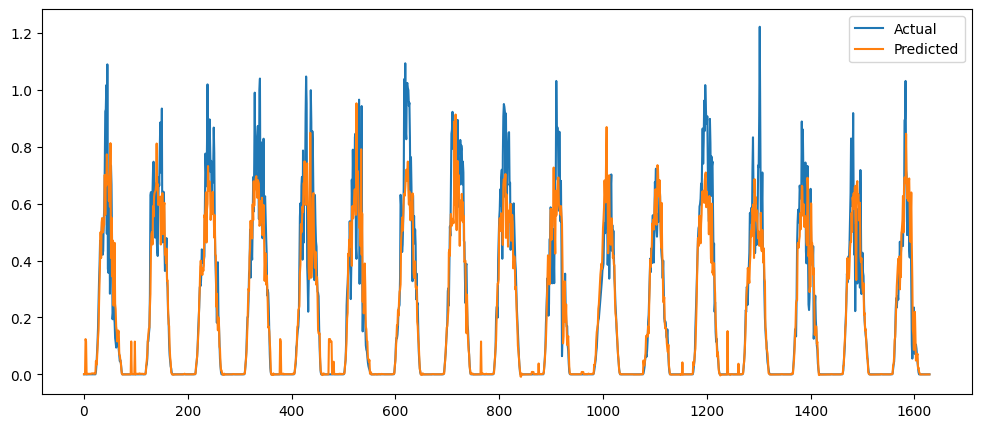

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.show()


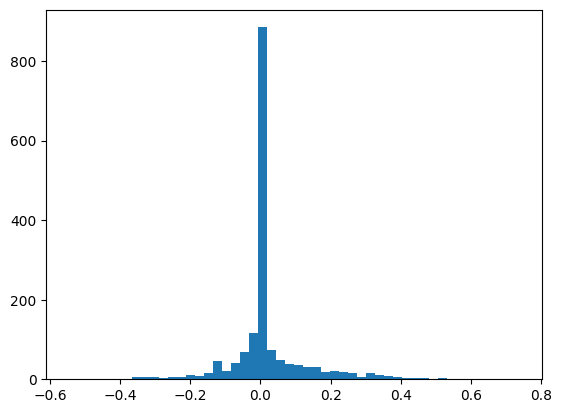

In [ ]:
residuals = y_test - y_pred
plt.hist(residuals, bins=50)
plt.show()


HYPERPARAMETER TUNING

In [ ]:
# Hyperparameter tuning XGB
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

tcv = TimeSeriesSplit(n_splits=5)

xgb = XGBRegressor(
    objetive = 'reg:squarederror',
    random_state = 42
)

param_grid = {
    'n_estimators': [200, 400],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,
    cv=tcv,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [02:39:42] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "objetive" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamm...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [200, 400],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='r2', verbose=2)

In [ ]:
print('Best Parameters: ')
best_param = random_search.best_params_
print(best_param)

Best Parameters: 
{'subsample': 1.0, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


In [ ]:
print(random_search.best_score_)

0.8870465592822733


In [ ]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

In [ ]:
print(f'R2_score: {r2_score(y_test, y_pred)}')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')

R2_score: 0.8756288627052656
Mean squared error: 0.010337987064636317


<Figure size 1000x600 with 0 Axes>

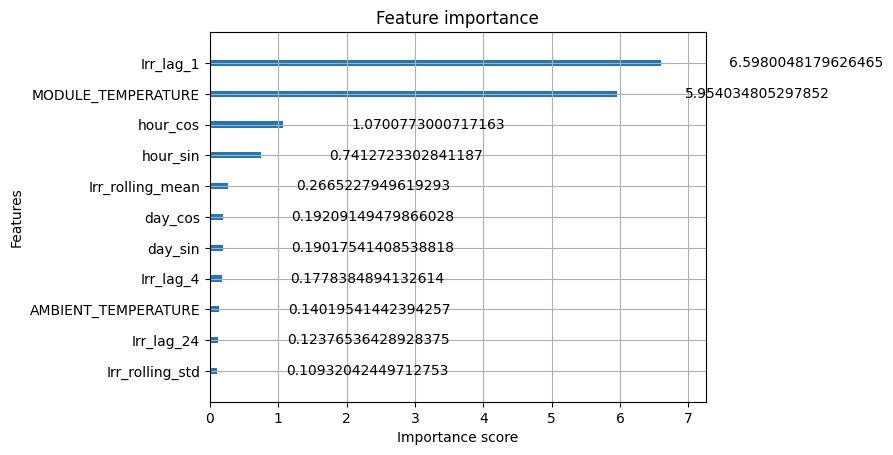

In [ ]:
# Feature importance
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(best_model, importance_type = 'gain')
plt.show()

In [ ]:
# Gridserach
#grid_search = GridSearchCV(
 #   estimator=xgb,
  #  param_grid=param_grid,
   # cv = tcv,
    #scoring='neg_mean_squared_error',
    #verbose=2,
    #n_jobs=-1)

#grid_search.fit(x_train, y_train)

Save model

In [ ]:
import joblib
joblib.dump(best_model, "solar_model2.pkl")


['solar_model2.pkl']

In [ ]:
feature_columns = x_train.columns.tolist()
joblib.dump(feature_columns, "feature_columns.pkl")

['feature_columns.pkl']

In [ ]:
x_train.columns

Index(['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'Irr_lag_1', 'Irr_lag_4',
       'Irr_lag_24', 'Irr_rolling_std', 'Irr_rolling_mean', 'hour_sin',
       'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos'],
      dtype='object')